<a href="https://colab.research.google.com/github/vishnuvilashini2004/covid_19_liver_cancer/blob/main/Covid19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from scipy.stats import mannwhitneyu,ttest_1samp,ttest_ind,ttest_rel,wilcoxon,shapiro,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import catboost as cb
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import cross_validate
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **1.DATA ACQUISITION**

In [ ]:
df = pd.read_csv("covid-liver.csv", encoding="ISO-8859-1")

In [ ]:
df

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.47,NaN,0.0,0.70,NaN,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,NaN,NaN,2.0,NaN,NaN,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,NaN,NaN,0.0,NaN,NaN,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,NaN,Symptomatic,72,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
446,N,Pandemic,12,NaN,Symptomatic,63,M,NaN,NaN,75.0,...,NaN,NaN,NaN,2.93,NaN,0.0,1.63,1.63,Y,NaN
447,N,Pandemic,12,NaN,Symptomatic,79,F,NaN,NaN,63.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
448,N,Pandemic,12,NaN,Symptomatic,84,F,NaN,NaN,65.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN


## **2....DATA PREPROCESSING**

# Viewing the data shape

In [ ]:

data=df.copy()
data.shape

(450, 27)

# The columns in the dataset are :

In [ ]:
print(df.columns)

Index(['Cancer', 'Year', 'Month', 'Bleed', 'Mode_Presentation', 'Age',
       'Gender', 'Etiology', 'Cirrhosis', 'Size', 'HCC_TNM_Stage',
       'HCC_BCLC_Stage', 'ICC_TNM_Stage', 'Treatment_grps', 'Survival_fromMDM',
       'Alive_Dead', 'Type_of_incidental_finding', 'Surveillance_programme',
       'Surveillance_effectiveness', 'Mode_of_surveillance_detection',
       'Time_diagnosis_1st_Tx', 'Date_incident_surveillance_scan', 'PS',
       'Time_MDM_1st_treatment', 'Time_decisiontotreat_1st_treatment',
       'Prev_known_cirrhosis', 'Months_from_last_surveillance'],
      dtype='object')


# Finding the missing values

In [ ]:
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treat

# Displaying data in the form of heatmap

<ipython-input-9-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

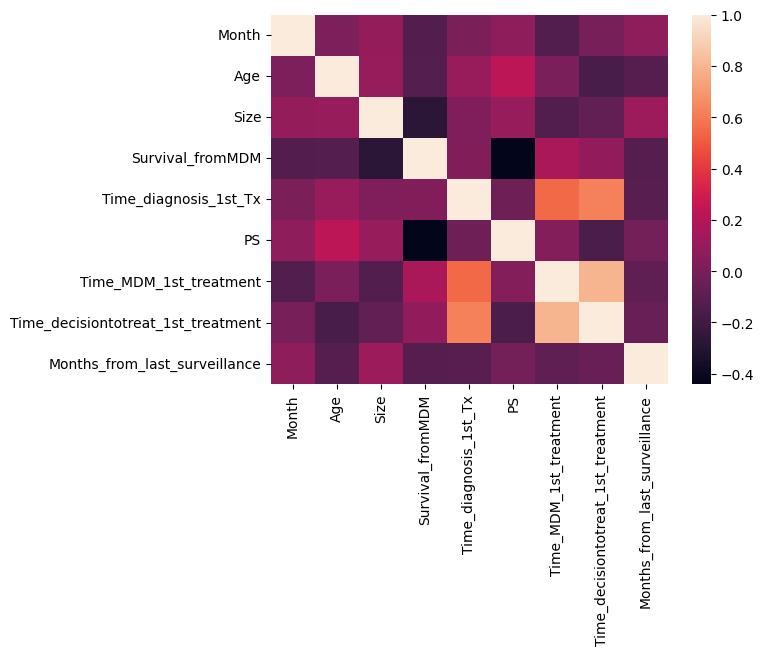

In [ ]:
sns.heatmap(df.corr())


# **1. Handling missing values**

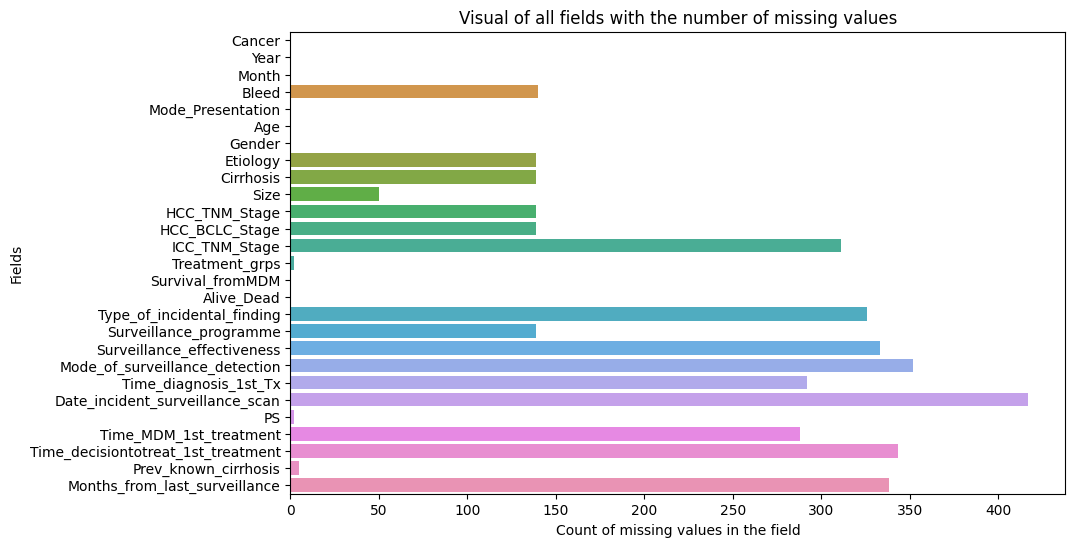

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate count of missing values for each field
missing_values_count = df.isnull().sum()

# Check if there are any missing values
if missing_values_count.sum() == 0:
    print("No missing values in the dataset.")
else:
    # Visualize missing values count for each field
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values_count, y=df.columns)
    plt.xlabel("Count of missing values in the field")
    plt.ylabel("Fields")
    plt.title("Visual of all fields with the number of missing values")
    plt.show()

Using median to fill missing values in statistical **data**

In [ ]:
num_cols = ['Size', 'HCC_TNM_Stage', 'HCC_BCLC_Stage', 'ICC_TNM_Stage', 'Treatment_grps', 'Surveillance_effectiveness', 'Time_diagnosis_1st_Tx', 'PS', 'Time_MDM_1st_treatment', 'Time_decisiontotreat_1st_treatment', 'Months_from_last_surveillance']
for col in num_cols:
    if df[col].dtype != 'object':  # Check if column contains numerical values
        df[col].fillna(df[col].median(), inplace=True)


*Using* mode to fill missing values in categorical data

In [ ]:
cat_cols = ['Bleed','Cirrhosis','ICC_TNM_Stage','Treatment_grps','Surveillance_effectiveness','HCC_TNM_Stage','HCC_BCLC_Stage','Etiology','Type_of_incidental_finding','Surveillance_programme','Mode_of_surveillance_detection','Date_incident_surveillance_scan','Prev_known_cirrhosis']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.470,Y,0.0,0.70,1.37,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,1.915,Y,2.0,1.80,1.37,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,1.915,Y,0.0,1.80,1.37,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,Consistent,US,1.915,Y,2.0,1.80,1.37,Y,6.300000
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,Consistent,US,1.915,Y,0.0,1.80,1.37,Y,6.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,N,Symptomatic,72,F,NAFLD,Y,40.0,...,N,Consistent,US,1.915,Y,1.0,1.80,1.37,Y,6.300000
446,N,Pandemic,12,N,Symptomatic,63,M,NAFLD,Y,75.0,...,N,Consistent,US,2.930,Y,0.0,1.63,1.63,Y,6.300000
447,N,Pandemic,12,N,Symptomatic,79,F,NAFLD,Y,63.0,...,N,Consistent,US,1.915,Y,1.0,1.80,1.37,Y,6.300000
448,N,Pandemic,12,N,Symptomatic,84,F,NAFLD,Y,65.0,...,N,Consistent,US,1.915,Y,2.0,1.80,1.37,Y,6.300000


# DATASET






In [ ]:
# Sample 50% of the original dataset
sample_df = df.sample(frac=0.5, replace=True, random_state=1)

new_df = pd.concat([df, sample_df])

# Sample additional fractions to augment the dataset
sample_df2 = df.sample(frac=0.2, replace=True, random_state=2)
new_df = pd.concat([new_df, sample_df2])

sample_df3 = df.sample(frac=0.15, replace=True, random_state=3)
new_df = pd.concat([new_df, sample_df3])

sample_df4 = df.sample(frac=0.1, replace=True, random_state=4)
new_df = pd.concat([new_df, sample_df4])

sample_df5 = df.sample(frac=0.05, replace=True, random_state=5)
new_df = pd.concat([new_df, sample_df5])

# Shuffle the augmented dataset
new_df = new_df.sample(frac=1, random_state=6)

# Save the augmented dataset to a CSV file
new_df.to_csv('augmented_datacovid.csv', index=False)

# DATASET1

In [ ]:
df1 = pd.read_csv('augmented_datacovid.csv')

In [ ]:
df1

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Pandemic,8,N,Incidental,72,M,ARLD,Y,22.0,...,N,Consistent,US,2.270,Y,1.0,2.27,2.03,N,6.3
1,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,Consistent,US,1.915,Y,0.0,1.80,1.37,Y,6.3
2,N,Pandemic,7,N,Symptomatic,68,M,NAFLD,Y,27.0,...,N,Consistent,US,3.300,Y,1.0,1.80,1.37,Y,6.3
3,Y,Pandemic,11,N,Symptomatic,61,M,No established CLD,N,32.0,...,N,Consistent,US,0.100,Y,0.0,1.13,1.17,N,6.3
4,N,Prepandemic,8,N,Symptomatic,71,F,NAFLD,Y,75.0,...,N,Consistent,US,1.915,Y,2.0,1.80,1.37,Y,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,N,Prepandemic,4,N,Symptomatic,87,F,NAFLD,Y,40.0,...,N,Consistent,US,1.915,Y,3.0,1.80,1.37,Y,6.3
896,N,Prepandemic,9,N,Surveillance,80,M,NAFLD,Y,29.0,...,N,Consistent,US,1.915,Y,2.0,1.80,1.37,Y,6.3
897,Y,Prepandemic,12,N,Symptomatic,65,M,HH,N,110.0,...,N,Consistent,US,1.915,Y,0.0,1.80,1.37,N,6.3
898,Y,Pandemic,5,N,Incidental,78,M,NAFLD,Y,32.0,...,N,Consistent,US,1.070,Y,0.0,0.60,0.60,N,6.3


Again check if all colums are filled without null values

In [ ]:
print('Missing Values:')
print(df1.isnull().sum())

Missing Values:
Cancer                                0
Year                                  0
Month                                 0
Bleed                                 0
Mode_Presentation                     0
Age                                   0
Gender                                0
Etiology                              0
Cirrhosis                             0
Size                                  0
HCC_TNM_Stage                         0
HCC_BCLC_Stage                        0
ICC_TNM_Stage                         0
Treatment_grps                        0
Survival_fromMDM                      0
Alive_Dead                            0
Type_of_incidental_finding            0
Surveillance_programme                0
Surveillance_effectiveness            0
Mode_of_surveillance_detection        0
Time_diagnosis_1st_Tx                 0
Date_incident_surveillance_scan       0
PS                                    0
Time_MDM_1st_treatment                0
Time_decisiontotreat_1st

# 2. Label Encoding

We need to do label encoding and convert categorical to numerial values

In [ ]:
# select the categorical columns to encode
categorical_cols = ['Cancer', 'Year', 'Bleed', 'Mode_Presentation', 'Gender', 'Etiology', 'Cirrhosis', 'HCC_TNM_Stage', 'HCC_BCLC_Stage', 'ICC_TNM_Stage', 'Treatment_grps', 'Alive_Dead', 'Type_of_incidental_finding', 'Surveillance_programme', 'Surveillance_effectiveness', 'Mode_of_surveillance_detection', 'Date_incident_surveillance_scan', 'Prev_known_cirrhosis']

# create a LabelEncoder object for each categorical column
le_dict = {}
for col in categorical_cols:
    le_dict[col] = LabelEncoder()

# fit and transform each categorical column
for col in categorical_cols:
    df1[col] = le_dict[col].fit_transform(df1[col])


In [ ]:
df1

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,1,0,8,0,0,72,1,0,1,22.0,...,0,0,2,2.270,1,1.0,2.27,2.03,0,6.3
1,1,1,1,0,0,66,0,0,1,60.0,...,0,0,2,1.915,1,0.0,1.80,1.37,1,6.3
2,0,0,7,0,2,68,1,4,1,27.0,...,0,0,2,3.300,1,1.0,1.80,1.37,1,6.3
3,1,0,11,0,2,61,1,5,0,32.0,...,0,0,2,0.100,1,0.0,1.13,1.17,0,6.3
4,0,1,8,0,2,71,0,4,1,75.0,...,0,0,2,1.915,1,2.0,1.80,1.37,1,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,1,4,0,2,87,0,4,1,40.0,...,0,0,2,1.915,1,3.0,1.80,1.37,1,6.3
896,0,1,9,0,1,80,1,4,1,29.0,...,0,0,2,1.915,1,2.0,1.80,1.37,1,6.3
897,1,1,12,0,2,65,1,3,0,110.0,...,0,0,2,1.915,1,0.0,1.80,1.37,0,6.3
898,1,0,5,0,0,78,1,4,1,32.0,...,0,0,2,1.070,1,0.0,0.60,0.60,0,6.3


## 3. OUTLIER DETECTION AND REMOVAL

In [ ]:
# Calculate Z-score for each column
z_scores = np.abs((df1 - df1.mean()) / df1.std())

# Remove rows where absolute Z-score is greater than 3
df1 = df1[(z_scores < 3).all(axis=1)]


In [ ]:
df1.dtypes

Cancer                                  int64
Year                                    int64
Month                                   int64
Bleed                                   int64
Mode_Presentation                       int64
Age                                     int64
Gender                                  int64
Etiology                                int64
Cirrhosis                               int64
Size                                  float64
HCC_TNM_Stage                           int64
HCC_BCLC_Stage                          int64
ICC_TNM_Stage                           int64
Treatment_grps                          int64
Survival_fromMDM                      float64
Alive_Dead                              int64
Type_of_incidental_finding              int64
Surveillance_programme                  int64
Surveillance_effectiveness              int64
Mode_of_surveillance_detection          int64
Time_diagnosis_1st_Tx                 float64
Date_incident_surveillance_scan   

In [ ]:
print(df1.isnull().sum())

Cancer                                0
Year                                  0
Month                                 0
Bleed                                 0
Mode_Presentation                     0
Age                                   0
Gender                                0
Etiology                              0
Cirrhosis                             0
Size                                  0
HCC_TNM_Stage                         0
HCC_BCLC_Stage                        0
ICC_TNM_Stage                         0
Treatment_grps                        0
Survival_fromMDM                      0
Alive_Dead                            0
Type_of_incidental_finding            0
Surveillance_programme                0
Surveillance_effectiveness            0
Mode_of_surveillance_detection        0
Time_diagnosis_1st_Tx                 0
Date_incident_surveillance_scan       0
PS                                    0
Time_MDM_1st_treatment                0
Time_decisiontotreat_1st_treatment    0


In [ ]:
print(df1)

     Cancer  Year  Month  Bleed  Mode_Presentation  Age  Gender  Etiology  \
0         1     0      8      0                  0   72       1         0   
2         0     0      7      0                  2   68       1         4   
3         1     0     11      0                  2   61       1         5   
4         0     1      8      0                  2   71       0         4   
5         0     0      4      0                  0   70       1         4   
..      ...   ...    ...    ...                ...  ...     ...       ...   
894       0     1      9      0                  0   75       1         4   
895       0     1      4      0                  2   87       0         4   
897       1     1     12      0                  2   65       1         3   
898       1     0      5      0                  0   78       1         4   
899       1     0     12      0                  0   74       1         4   

     Cirrhosis   Size  ...  Surveillance_programme  \
0            1   22.0

In [ ]:
df1

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,1,0,8,0,0,72,1,0,1,22.0,...,0,0,2,2.270,1,1.0,2.27,2.03,0,6.3
2,0,0,7,0,2,68,1,4,1,27.0,...,0,0,2,3.300,1,1.0,1.80,1.37,1,6.3
3,1,0,11,0,2,61,1,5,0,32.0,...,0,0,2,0.100,1,0.0,1.13,1.17,0,6.3
4,0,1,8,0,2,71,0,4,1,75.0,...,0,0,2,1.915,1,2.0,1.80,1.37,1,6.3
5,0,0,4,0,0,70,1,4,1,26.0,...,0,0,2,1.915,1,1.0,1.80,1.37,1,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0,1,9,0,0,75,1,4,1,65.0,...,0,0,2,1.915,1,1.0,1.80,1.37,1,6.3
895,0,1,4,0,2,87,0,4,1,40.0,...,0,0,2,1.915,1,3.0,1.80,1.37,1,6.3
897,1,1,12,0,2,65,1,3,0,110.0,...,0,0,2,1.915,1,0.0,1.80,1.37,0,6.3
898,1,0,5,0,0,78,1,4,1,32.0,...,0,0,2,1.070,1,0.0,0.60,0.60,0,6.3


In [ ]:
print(df1.isnull().sum())

Cancer                                0
Year                                  0
Month                                 0
Bleed                                 0
Mode_Presentation                     0
Age                                   0
Gender                                0
Etiology                              0
Cirrhosis                             0
Size                                  0
HCC_TNM_Stage                         0
HCC_BCLC_Stage                        0
ICC_TNM_Stage                         0
Treatment_grps                        0
Survival_fromMDM                      0
Alive_Dead                            0
Type_of_incidental_finding            0
Surveillance_programme                0
Surveillance_effectiveness            0
Mode_of_surveillance_detection        0
Time_diagnosis_1st_Tx                 0
Date_incident_surveillance_scan       0
PS                                    0
Time_MDM_1st_treatment                0
Time_decisiontotreat_1st_treatment    0


### 4.NORMALIZATION - MIN MAX SCALING

In [ ]:
# Separate the target variable from the features
y = df1['Year']
X = df1.drop('Year', axis=1)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
X_normalized = scaler.fit_transform(X)

In [ ]:
df1

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,1,0,8,0,0,72,1,0,1,22.0,...,0,0,2,2.270,1,1.0,2.27,2.03,0,6.3
2,0,0,7,0,2,68,1,4,1,27.0,...,0,0,2,3.300,1,1.0,1.80,1.37,1,6.3
3,1,0,11,0,2,61,1,5,0,32.0,...,0,0,2,0.100,1,0.0,1.13,1.17,0,6.3
4,0,1,8,0,2,71,0,4,1,75.0,...,0,0,2,1.915,1,2.0,1.80,1.37,1,6.3
5,0,0,4,0,0,70,1,4,1,26.0,...,0,0,2,1.915,1,1.0,1.80,1.37,1,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0,1,9,0,0,75,1,4,1,65.0,...,0,0,2,1.915,1,1.0,1.80,1.37,1,6.3
895,0,1,4,0,2,87,0,4,1,40.0,...,0,0,2,1.915,1,3.0,1.80,1.37,1,6.3
897,1,1,12,0,2,65,1,3,0,110.0,...,0,0,2,1.915,1,0.0,1.80,1.37,0,6.3
898,1,0,5,0,0,78,1,4,1,32.0,...,0,0,2,1.070,1,0.0,0.60,0.60,0,6.3


## **DATA VISUALIZATION**

### CANCER PATIENTS DISTRIBUTION IN DATASET

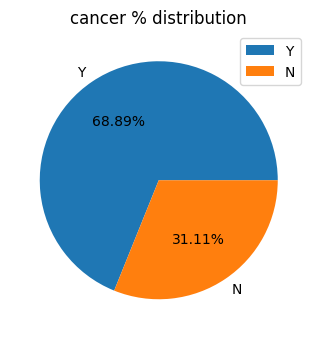

In [ ]:
plt.subplot(1,2,2)
s=data['Cancer'].value_counts()
label=data['Cancer'].value_counts().index
plt.pie(s,labels=label,autopct='%.2f%%')
plt.title('cancer % distribution')
plt.tight_layout()
plt.legend()
plt.show()

Here we can see that 69% data is cancer and 31% of data is no cancer . So the dataset is balanced




---



a) Was COVID a reason of increasing of the tumor size?

<Axes: xlabel='Size', ylabel='Count'>

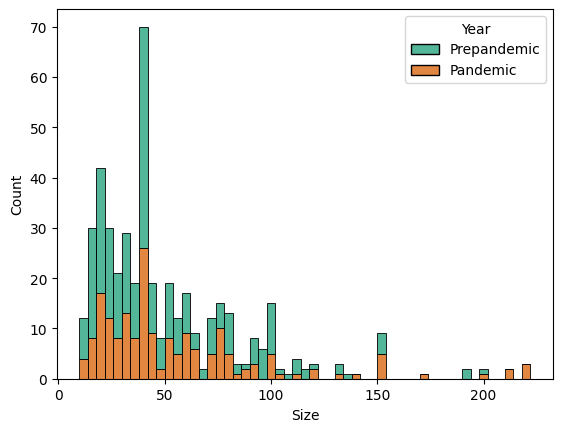

In [ ]:
sns.histplot(df, x='Size', hue='Year', binwidth=4, palette="Dark2", multiple="stack")

"It seems that in the pre-pandemic time, the size of tumors detected were more around the 50 mm, while for the pandemic time, the peak is fewer.

Likely, people were not able to detect in time the tumors during the pandemic because the hospitals were collapsed. Hence, bigger tumors were detected."

-----------------------------------------------------------

b) Was COVID a reason to change the mode of presentation of the cancer?

<Axes: xlabel='Mode_Presentation', ylabel='Percent'>

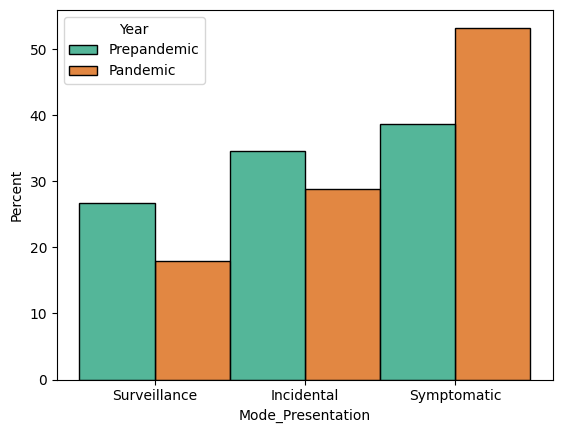

In [ ]:
sns.histplot(df, x='Mode_Presentation', hue='Year', palette="Dark2", multiple="dodge", stat = 'percent', common_norm= False)

It seems that Symptomatic tumors were detected more in the pandemic than other tumors. It can be because incidental and surveillance might need doctor revisions and laboratory test.

------------------------------------------------------------------------

c) Did COVID had more impact in one sex than other (Male of Female)?

<Axes: xlabel='Gender', ylabel='Percent'>

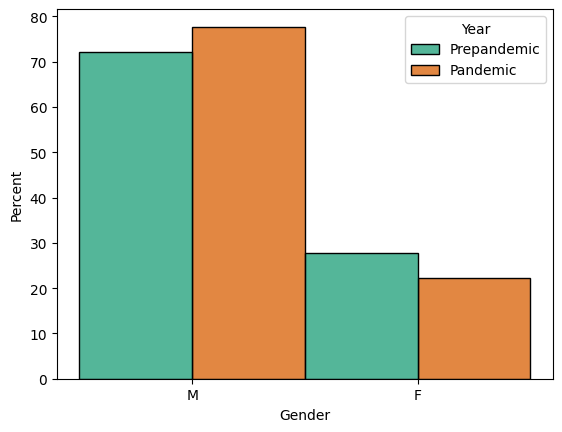

In [ ]:
sns.histplot(df, x='Gender', hue='Year', binwidth=2, palette="Dark2", multiple="dodge", stat='percent',  common_norm=False)

It seems likely men increases the liver cancer disease during the pandemic.

------------------------------------------------------------------------

d) Did COVID increases the underlying liver diseases?

<Axes: xlabel='Cirrhosis', ylabel='Count'>

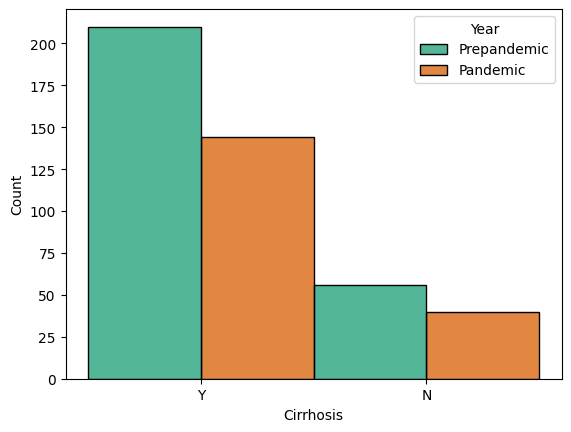

In [ ]:
sns.histplot(df, x='Cirrhosis', hue='Year', binwidth=2, palette="Dark2", multiple="dodge")

Previous underlying liver disease cases were detected in the pre-pandemic time. It seems likely that detecting an underlying liver disease wasn't able because the health system was saturated.

------------------------------------------------------------------------

e) Did COVID increases the previous know cirrhosis?

<Axes: xlabel='Prev_known_cirrhosis', ylabel='Percent'>

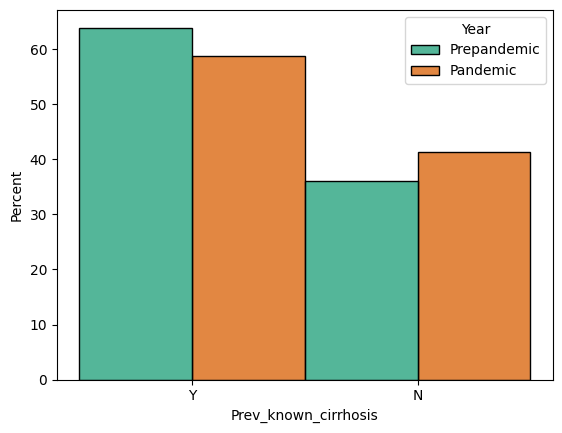

In [ ]:
sns.histplot(df, x='Prev_known_cirrhosis', hue='Year', binwidth=2, palette="Dark2", multiple="dodge", \
            stat = 'percent', common_norm = False)

This plot followed the same trend than previous plots. Predicting diseases during the pandemic was fewer. The known cirrhosis cases are more for pre-pandemic than pandemic, and also the not known cirrhosis during the pandemic cases increased.

---------------------




f) Can the size of the tumor determine if the patient can live or not?

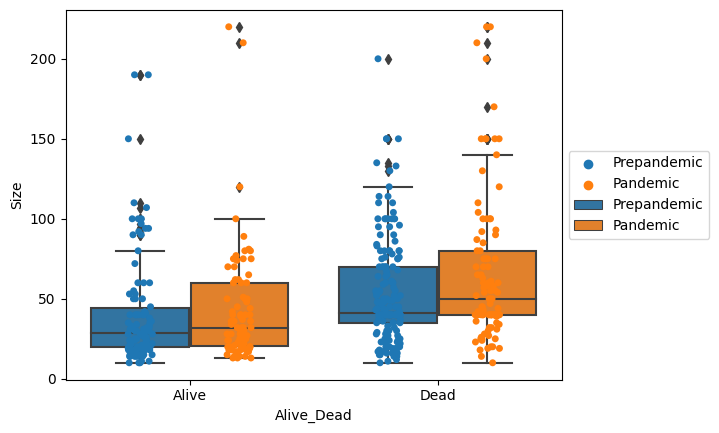

In [ ]:
sns.stripplot(data=df, x='Alive_Dead', y='Size', hue='Year', dodge=True)
sns.boxplot(data=df, x='Alive_Dead', y='Size', hue='Year', dodge=True)
# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It seems that alive patient tend to have smaller tumors, in fact the 50% of the data is around 25 mm. However, for dead patient, the 50% of the data is around 50 mm. The time pandemic or pre-pandemic does not influence roughly.



---



g) Size vs age

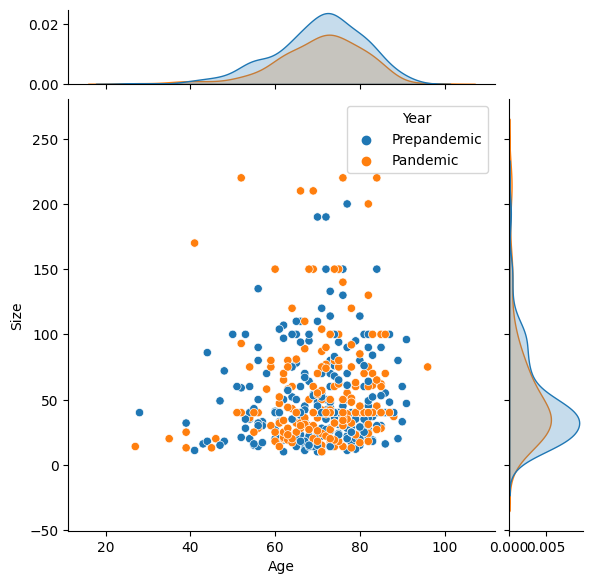

In [ ]:
sns.jointplot(data=df, x='Age', y='Size', hue='Year', marginal_ticks=True)



---




## **Final conclusions**


1.   Tumors detected in the pre-pandemic time were more smaller than bigger ones.
2.   The number of symptomatic tumors increased during the pandemic time.
2.   The underlying diseases and known cirrhosis cases were fewer during the pandemic time.
2.  The lower tumor, the higher possibility to be alive.


# STATISTICAL ANALYSIS

## **QUESTION 1:**

# Check whether cancer effected people are more in Pandemic compare to Prepandemic?

Ho(null-hypothesis): cancer effected during pandemic = cancer effected during prepandemic

Ha(alternative-hypothesis): cancer effected during pandemic != cancer effected during prepandemic

**Crosstabulation**

In [ ]:
cy=pd.crosstab(df['Year'],df['Cancer'])
cy

Cancer,N,Y
Year,,
Pandemic,64,120
Prepandemic,76,190


**Proportions Calculation:**

In [ ]:
x=np.array([120,190])
n=np.array([(120+64),(190+76)])
x,n

(array([120, 190]), array([184, 266]))

**Hypothesis Testing:two-proportion z-test**

In [ ]:
proportions_ztest(x,n)

(-1.3992175570207408, 0.16174775323104773)

**Visualizating in graph**

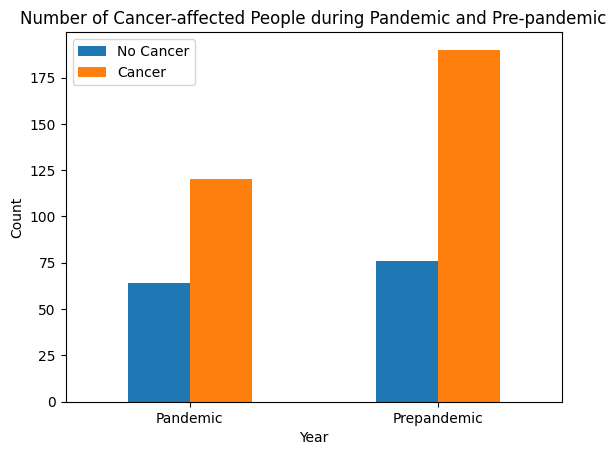

In [ ]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of Year and Cancer
cy = pd.crosstab(df['Year'], df['Cancer'])

# Plot the bar chart
ax = cy.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Cancer-affected People during Pandemic and Pre-pandemic')
plt.legend(['No Cancer', 'Cancer'])

# Rotate the x-axis tick labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


INSIGHTS: The statistical analysis, with a p-value of 0.1617 > 0.05, indicates that the null hypothesis cannot be rejected. Therefore, we do not have sufficient evidence to conclude that there is a significant difference in the percentage of people affected by cancer between the pandemic and pre-pandemic periods.

## **QUESTION 2:**

# Does the incidence of cancer differ between males and females?

Ho(null-hypothesis): male having cancer = female having cancer

Ha(alternative-hypothesis) male having cancer != female having cancer

**Crosstabulation**

In [ ]:
g=pd.crosstab(df['Cancer'],df['Gender'])
g

Gender,F,M
Cancer,,
N,52,88
Y,63,247


**Proportions Calculation:**

In [ ]:
x=np.array([63,247])
n=np.array([(63+52),(247+88)])
x, n

(array([ 63, 247]), array([115, 335]))

**Hypothesis Testing: proportion z-test**

In [ ]:
proportions_ztest(x,n)

(-3.7871536775353514, 0.00015238286015564813)

**Visualizating in graph**

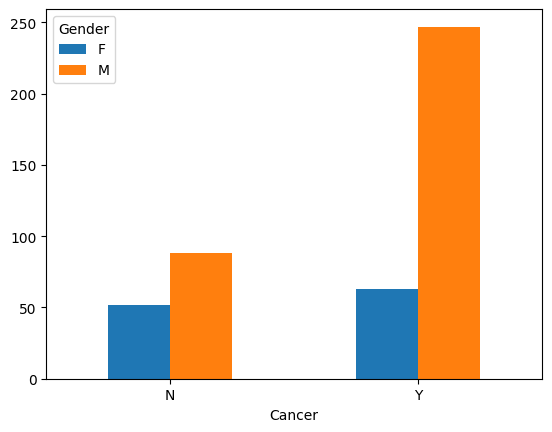

In [ ]:
g.plot.bar(rot=0)
plt.show()

INSIGHTS : Based on the statistical analysis, the p-value (0.00015) is less than the significance level of 0.05, providing strong evidence to reject the null hypothesis which conclude **Gender: Male are mostly effected with cancer compare female**

## **QUESTION 3:**

# Check whether death influenced HCC_TNM_Stages

Ho(null-hypothesis): HCC_TNM_Stage I dead = HCC_TNM_Stage II dead = HCC_TNM_Stage III dead = HCC_TNM_Stage IV dead

Ha(alternative-hypothesis): HCC_TNM_Stage I dead != HCC_TNM_Stage II dead != HCC_TNM_Stage III dead != HCC_TNM_Stage IV dead

**Cross-Tabulation (Contingency Table):**

In [ ]:
st=pd.crosstab(df['HCC_TNM_Stage'],df['Alive_Dead'])
st

Alive_Dead,Alive,Dead
HCC_TNM_Stage,,
I,126,140
II,32,26
IIIA+IIIB,20,66
IV,8,32


**Chi-Square Test of Independence:**

In [ ]:
chi2_contingency(st)

Chi2ContingencyResult(statistic=27.673621507175177, pvalue=4.252478639618165e-06, dof=3, expected_freq=array([[109.94666667, 156.05333333],
       [ 23.97333333,  34.02666667],
       [ 35.54666667,  50.45333333],
       [ 16.53333333,  23.46666667]]))

**Percentage Calculation:**

In [ ]:
print('% of dead in stage I:',45/(94+45))
print('% of dead in stage II:',67/(36+67))
print('% of dead in stage III:',120/(120+48))
print('% of dead in stage IV:',32/(32+8))

% of dead in stage I: 0.3237410071942446
% of dead in stage II: 0.6504854368932039
% of dead in stage III: 0.7142857142857143
% of dead in stage IV: 0.8


**Visualizing the Bar Chart:**

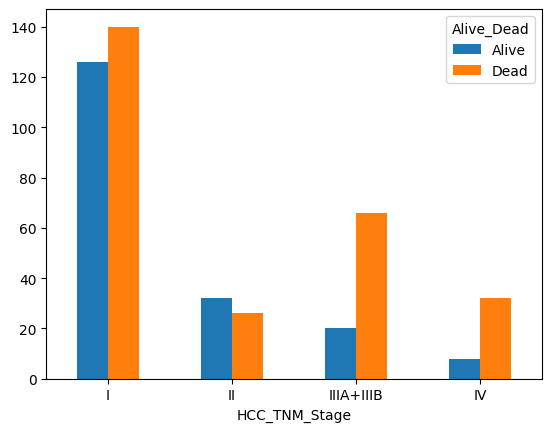

In [ ]:
st.plot.bar(rot=0)
plt.show()

Based on the chi-square test, the p-value is very small (5.466e-13), providing strong evidence against the null hypothesis. This indicates that **the proportion of deaths differs significantly among the HCC_TNM_Stages. **

## **QUESTION 4:**

# Does the pandemic affect cirrhosis?

Ho(null-hypothesis): prepandemic cirrhosis = pandemic cirrhosis

Ha(alternative-hypothesis): prepandemic cirrhosis = pandemic cirrhosis

**Cross-Tabulation (Contingency Table):**

In [ ]:
c=pd.crosstab(df['Year'],df['Cirrhosis'])
c

Cirrhosis,N,Y
Year,,
Pandemic,40,144
Prepandemic,56,210


**Proportions Calculation:**

In [ ]:
x=np.array([138,196])
n=np.array([(138+46),(70+196)])
x, n

(array([138, 196]), array([184, 266]))

**Proportions Z-Test:**

In [ ]:
proportions_ztest(x,n)

(0.3137185264252758, 0.7537348285881219)

**Plotting the Bar Chart:**

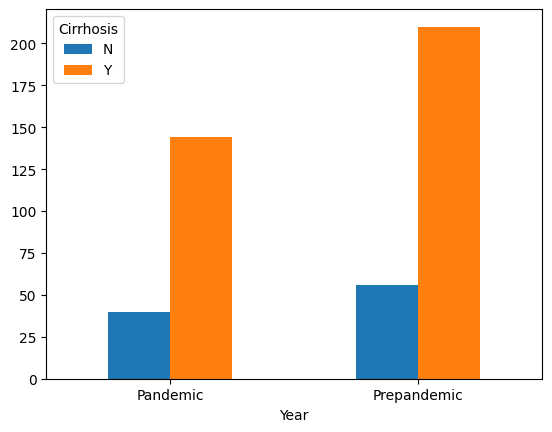

In [ ]:
c.plot.bar(rot=0)
plt.show()

The results of the proportions Z-test indicate that the p-value (0.75) is greater than the significance level (0.05). This suggests that there is not enough evidence to conclude that there is a significant difference in the occurrence of cirrhosis between the pandemic and pre-pandemic periods.

## **QUESTION 5:**

# Does the death rate increase from the pre-pandemic period to the pandemic period?



Ho(null-hypothesis): prepandemic death rates = pandemic death rates

Ha(alternative-hypothesis): prepandemic death rates != pandemic death rates

**Create Cross-Tabulation (Contingency Table):**

In [ ]:
cy = pd.crosstab(df['Year'], df['Alive_Dead'])
cy

Alive_Dead,Alive,Dead
Year,,
Pandemic,84,100
Prepandemic,102,164


**Proportions Calculation:**

In [ ]:
x=np.array([100,164])
n=np.array([(100+84),(102+164)])

x,n

(array([100, 164]), array([184, 266]))

**Proportions Z-Test:**

In [ ]:
proportions_ztest(x,n)

(-1.5473750915746596, 0.12177282395542376)

**Print Death Rates:**

In [ ]:
print('pandemic death:', 100 / (100 + 84))
print('prepandemic death:', 164 / (164 + 102))

pandemic death: 0.5434782608695652
prepandemic death: 0.6165413533834586


**Plotting the Bar Chart:**

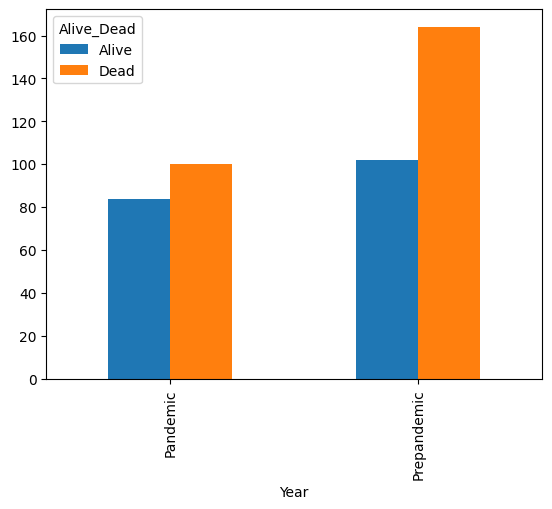

In [ ]:
cy.plot.bar()
plt.show()

INSIGHTS : The results of the proportions Z-test indicate that the p-value (0.1218) is greater than the significance level (0.05). Therefore, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that there is a significant difference in death rates between the pre-pandemic and pandemic periods.

## 1. FEATURE SELECTION - SelectKBest

In [ ]:
# Separate the target variable from the features
y = df1['Year']
X = df1.drop('Year', axis=1)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with F-test
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)

# Filter the training and testing data to only use the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 2 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# MODEL TRAINING AND TESTING

## A. DECISION TREES

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics for Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print the evaluation metrics for each classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decision Tree Classifier:
Accuracy: 0.9051094890510949
Precision: 0.9083504776935433
Recall: 0.9051094890510949
F1 Score: 0.9055195382530563


## B. KNN MODEL

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.6715328467153284
Precision: 0.6761516469545666
Recall: 0.6715328467153284
F1 Score: 0.6729522477990412


## C. CATBOOST MODEL

In [ ]:
# Defining the CatBoost classifier
model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)

# Training the model
model.fit(X_train_selected, y_train, verbose=False)

# Making predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy_cb = accuracy_score(y_test, y_pred)
precision_cb = precision_score(y_test, y_pred)
recall_cb = recall_score(y_test, y_pred)
f1_cb = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)

Accuracy: 0.7737226277372263
Precision: 0.8
Recall: 0.810126582278481
F1 Score: 0.8050314465408804


### D. LIGHTGBM MODEL

In [ ]:
# Train a LightGBM classifier on the SVD-transformed training data
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_selected, y_train)

# Make predictions on the SVD-transformed testing data
y_pred = lgb_model.predict(X_test_selected)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred)

# Calculate precision
precision_lgb = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_lgb = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_lgb = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1 Score:", f1_lgb)

[LightGBM] [Info] Number of positive: 336, number of negative: 212
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613139 -> initscore=0.460525
[LightGBM] [Info] Start training from score 0.460525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

# E. XGBOOST MODEL

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_selected)

# Evaluating the model
accuracy_scores = accuracy_score(y_test, y_pred)
precision_scores = precision_score(y_test, y_pred)
recall_scores = recall_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_scores)
print("Precision:", precision_scores)
print("Recall:", recall_scores)
print("F1 Score:", f1_scores)

Accuracy: 0.9197080291970803
Precision: 0.9358974358974359
Recall: 0.9240506329113924
F1 Score: 0.9299363057324842


## TABLE COMPARISION

In [ ]:
# Define the performance metrics for each model
model_metrics = [
    ['Decision Trees', accuracy_dt, precision_dt, recall_dt, f1_dt],
    ['KNN', accuracy_knn, precision_knn, recall_knn, f1_knn],
    ['CatBoost', accuracy_cb, precision_cb, recall_cb, f1_cb],
    ['LightGBM', accuracy_lgb, precision_lgb, recall_lgb, f1_lgb],
    ['XGBoost', accuracy_scores, precision_scores, recall_scores, f1_scores]
]

# Define the headers for the table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Print the table
print(tabulate(model_metrics, headers=headers, tablefmt='grid'))
# Find the best performing model based on the highest accuracy
best_model_idx = max(range(len(model_metrics)), key=lambda i: model_metrics[i][1])
best_model_name = model_metrics[best_model_idx][0]

# Print the best performing model
print(f"The best performing model: {best_model_name}")

+----------------+------------+-------------+----------+------------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |
+================+============+=============+==========+============+
| Decision Trees |   0.905109 |    0.90835  | 0.905109 |   0.90552  |
+----------------+------------+-------------+----------+------------+
| KNN            |   0.671533 |    0.676152 | 0.671533 |   0.672952 |
+----------------+------------+-------------+----------+------------+
| CatBoost       |   0.773723 |    0.8      | 0.810127 |   0.805031 |
+----------------+------------+-------------+----------+------------+
| LightGBM       |   0.868613 |    0.876003 | 0.868613 |   0.869348 |
+----------------+------------+-------------+----------+------------+
| XGBoost        |   0.919708 |    0.935897 | 0.924051 |   0.929936 |
+----------------+------------+-------------+----------+------------+
The best performing model: XGBoost


## BARCHART - PERFORMANCE COMPARISION

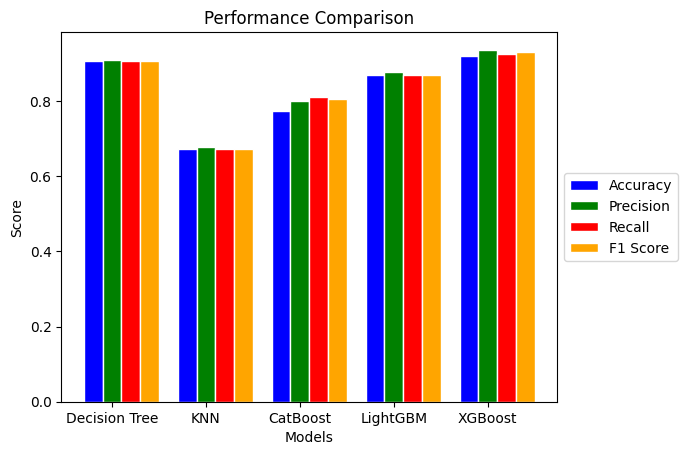

In [ ]:
# Define the models and corresponding performance metrics
models = ['Decision Tree', 'KNN', 'CatBoost', 'LightGBM', 'XGBoost']
accuracy = [0.9051094890510949, 0.6715328467153284, 0.7737226277372263, 0.8686131386861314, 0.9197080291970803]
precision = [0.9083504776935433, 0.6761516469545666, 0.8, 0.876002753971295, 0.9358974358974359]
recall = [0.9051094890510949, 0.6715328467153284, 0.810126582278481, 0.8686131386861314, 0.9240506329113924]
f1_score = [0.9055195382530563, 0.6729522477990412, 0.8050314465408804, 0.8693477748999293, 0.9299363057324842]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='white', label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()


## CROSS VALIDATION TESTING

In [ ]:
import xgboost as xgb
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(xgb_classifier, X_train, y_train, cv=5, scoring=scoring)

# Extract the performance scores
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1_score']

# Print the updated performance metrics
print("Accuracy Scores:", accuracy_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1 Scores:", f1_scores)

Accuracy Scores: [0.89090909 0.88181818 0.88181818 0.88073394 0.93577982]
Precision Scores: [0.93650794 0.88571429 0.92307692 0.921875   0.94117647]
Recall Scores: [0.88059701 0.92537313 0.88235294 0.88059701 0.95522388]
F1 Scores: [0.90769231 0.90510949 0.90225564 0.90076336 0.94814815]


# 2. FEATURE SELECTION WITH SVD

In [ ]:
# Assuming your dataset is stored in a DataFrame called "df"
X = df1.drop("Year", axis=1)  # Exclude the "year" column from the features
y = df1["Year"]  # Select the "year" column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SVD on the training set
svd = TruncatedSVD(n_components=10, random_state=42)
X_train_svd = svd.fit_transform(X_train)

# Transform the testing set using the same SVD model
X_test_svd = svd.transform(X_test)

# MODEL TRAINING AND TESTING

## A. DECISION TREES

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_svd, y_train)
y_pred_dt = dt_classifier.predict(X_test_svd)

# Calculate evaluation metrics for Decision Tree Classifier
accuracy_dt_1 = accuracy_score(y_test, y_pred_dt)
precision_dt_1 = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt_1 = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt_1 = f1_score(y_test, y_pred_dt, average='weighted')

# Print the evaluation metrics for each classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt_1)
print("Precision:", precision_dt_1)
print("Recall:", recall_dt_1)
print("F1 Score:", f1_dt_1)

Decision Tree Classifier:
Accuracy: 0.9197080291970803
Precision: 0.9253634038305572
Recall: 0.9197080291970803
F1 Score: 0.9201316879026575


#B. KNN MODEL

In [ ]:
# Train a KNN classifier on the SVD-transformed training data
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_svd, y_train)

# Make predictions on the SVD-transformed testing data
y_pred = knn_model.predict(X_test_svd)

# Calculate accuracy
accuracy_knn_1 = accuracy_score(y_test, y_pred)

# Calculate precision
precision_knn_1 = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_knn_1 = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_knn_1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_knn_1)
print("Precision:", precision_knn_1)
print("Recall:", recall_knn_1)
print("F1 Score:", f1_knn_1)

Accuracy: 0.7299270072992701
Precision: 0.7280333287425974
Recall: 0.7299270072992701
F1 Score: 0.7279865060528713


##C. CATBOOST MODEL

In [ ]:
# Defining the CatBoost classifier
model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)

# Training the model
model.fit(X_train_svd, y_train, verbose=False)

# Making predictions on the test set
y_pred = model.predict(X_test_svd)

# Evaluating the model
accuracy_cb_1 = accuracy_score(y_test, y_pred)
precision_cb_1 = precision_score(y_test, y_pred)
recall_cb_1 = recall_score(y_test, y_pred)
f1_cb_1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_cb_1)
print("Precision:", precision_cb_1)
print("Recall:", recall_cb_1)
print("F1 Score:", f1_cb_1)

Accuracy: 0.8175182481751825
Precision: 0.8214285714285714
Recall: 0.8734177215189873
F1 Score: 0.8466257668711655


##D. LIGHT GBM

In [ ]:
# Train a LightGBM classifier on the SVD-transformed training data
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_svd, y_train)

# Make predictions on the SVD-transformed testing data
y_pred = lgb_model.predict(X_test_svd)

# Calculate accuracy
accuracy_gbm_1 = accuracy_score(y_test, y_pred)

# Calculate precision
precision_gbm_1 = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_gbm_1 = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_gbm_1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_gbm_1)
print("Precision:", precision_gbm_1)
print("Recall:", recall_gbm_1)
print("F1 Score:", f1_gbm_1)

[LightGBM] [Info] Number of positive: 336, number of negative: 212
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613139 -> initscore=0.460525
[LightGBM] [Info] Start training from score 0.460525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

##E. XGBOOST MODEL

In [ ]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost model
xgb_classifier.fit(X_train_svd, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_svd)

# Calculate evaluation metrics
accuracy_xgb_1 = accuracy_score(y_test, y_pred)
precision_xgb_1 = precision_score(y_test, y_pred)
recall_xgb_1 = recall_score(y_test, y_pred)
f1_xgb_1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb_1)
print("Precision:", precision_xgb_1)
print("Recall:", recall_xgb_1)
print("F1 Score:", f1_xgb_1)

Accuracy: 0.8832116788321168
Precision: 0.9090909090909091
Recall: 0.8860759493670886
F1 Score: 0.8974358974358974


## TABLE COMPARISION: SVD

In [ ]:
# Define the performance metrics for each model
model_metrics = [
    ['Decision Trees', accuracy_dt_1, precision_dt_1, recall_dt_1, f1_dt_1],
    ['KNN', accuracy_knn_1, precision_knn_1, recall_knn_1, f1_knn_1],
    ['CatBoost', accuracy_cb_1, precision_cb_1, recall_cb_1, f1_cb_1],
    ['LightGBM', accuracy_gbm_1, precision_gbm_1, recall_gbm_1, f1_gbm_1],
    ['XGBoost', accuracy_xgb_1, precision_xgb_1, recall_xgb_1, f1_xgb_1]
]

# Define the headers for the table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Print the table
print(tabulate(model_metrics, headers=headers, tablefmt='grid'))

# Find the best performing model based on the highest accuracy
best_model_idx = max(range(len(model_metrics)), key=lambda i: model_metrics[i][1])
best_model_name = model_metrics[best_model_idx][0]

# Print the best performing model
print(f"The best performing model: {best_model_name}")

+----------------+------------+-------------+----------+------------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |
+================+============+=============+==========+============+
| Decision Trees |   0.919708 |    0.925363 | 0.919708 |   0.920132 |
+----------------+------------+-------------+----------+------------+
| KNN            |   0.729927 |    0.728033 | 0.729927 |   0.727987 |
+----------------+------------+-------------+----------+------------+
| CatBoost       |   0.817518 |    0.821429 | 0.873418 |   0.846626 |
+----------------+------------+-------------+----------+------------+
| LightGBM       |   0.89781  |    0.900102 | 0.89781  |   0.898186 |
+----------------+------------+-------------+----------+------------+
| XGBoost        |   0.883212 |    0.909091 | 0.886076 |   0.897436 |
+----------------+------------+-------------+----------+------------+
The best performing model: Decision Trees


## BARCHART - PERFORMANCE COMPARISION

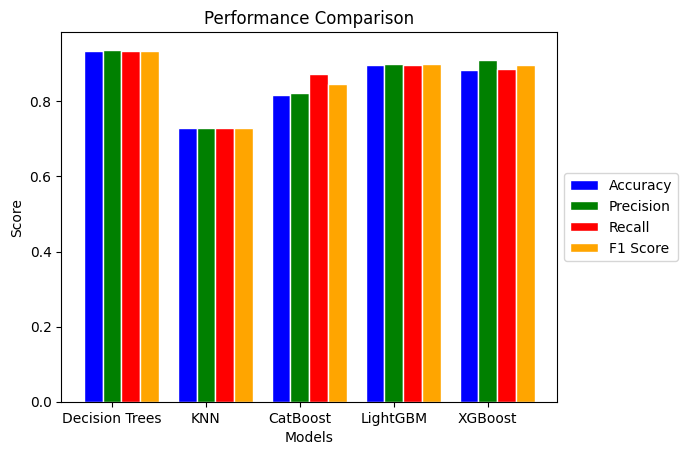

In [ ]:
# Create data
models = ['Decision Trees', 'KNN', 'CatBoost', 'LightGBM', 'XGBoost']
accuracy = [0.934307, 0.729927, 0.817518, 0.89781, 0.883212]
precision = [0.937375, 0.728033, 0.821429, 0.900102, 0.909091]
recall = [0.934307, 0.729927, 0.873418, 0.89781, 0.886076]
f1_score = [0.93459, 0.727987, 0.846626, 0.898186, 0.897436]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='white', label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()

## CROSS VALIDATION TESTING

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
# Create a Decision Trees classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(dt_model, X, y, cv=5, scoring=scoring)

# Print the scores
print("Accuracy Scores:", cv_results['test_accuracy'])
print("Precision Scores:", cv_results['test_precision'])
print("Recall Scores:", cv_results['test_recall'])
print("F1 Scores:", cv_results['test_f1_score'])
print("Average Accuracy:", cv_results['test_accuracy'].mean())

Accuracy Scores: [0.95620438 0.89781022 0.97810219 0.90510949 0.9270073 ]
Precision Scores: [0.95620438 0.89749975 0.97813826 0.90880512 0.92691482]
Recall Scores: [0.95620438 0.89781022 0.97810219 0.90510949 0.9270073 ]
F1 Scores: [0.95620438 0.89745444 0.97806543 0.90573538 0.92675317]
Average Accuracy: 0.9328467153284672


## 3. FEATURE SELECTION : PCa

In [ ]:
 # Assuming your dataset is stored in a DataFrame called "df"
X = df1.drop("Year", axis=1)  # Exclude the "year" column from the features
y = df1["Year"]  # Select the "year" column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA on the training set
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Transform the testing set using the same PCA model
X_test_pca = pca.transform(X_test)



# MODEL TRAINING AND TESTING

## A. DECISION TREES

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier_1 = DecisionTreeClassifier()
dt_classifier_1.fit(X_train_pca, y_train)
y_pred_dt_1 = dt_classifier_1.predict(X_test_pca)

# Calculate evaluation metrics for Decision Tree Classifier
accuracy_dt_2 = accuracy_score(y_test, y_pred_dt_1)
precision_dt_2 = precision_score(y_test, y_pred_dt_1, average='weighted')
recall_dt_2 = recall_score(y_test, y_pred_dt_1, average='weighted')
f1_dt_2 = f1_score(y_test, y_pred_dt_1, average='weighted')

# Print the evaluation metrics for each classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt_2)
print("Precision:", precision_dt_2)
print("Recall:", recall_dt_2)
print("F1 Score:", f1_dt_2)

Decision Tree Classifier:
Accuracy: 0.8905109489051095
Precision: 0.8903444743244974
Recall: 0.8905109489051095
F1 Score: 0.8903792147446454


## B. KNN

In [ ]:
# Train a KNN classifier on the SVD-transformed training data
knn_model_1 = KNeighborsClassifier()
knn_model_1.fit(X_train_pca, y_train)

# Make predictions on the SVD-transformed testing data
y_pred_1 = knn_model_1.predict(X_test_pca)

# Calculate accuracy
accuracy_knn_2 = accuracy_score(y_test, y_pred_1)

# Calculate precision
precision_knn_2 = precision_score(y_test, y_pred_1, average='weighted')

# Calculate recall
recall_knn_2 = recall_score(y_test, y_pred_1, average='weighted')

# Calculate F1-score
f1_knn_2 = f1_score(y_test, y_pred_1, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_knn_2)
print("Precision:", precision_knn_2)
print("Recall:", recall_knn_2)
print("F1 Score:", f1_knn_2)

Accuracy: 0.7518248175182481
Precision: 0.7508979260804078
Recall: 0.7518248175182481
F1 Score: 0.7511989371238315


### C. CATBOOST MODEL

In [ ]:
# Defining the CatBoost classifier
model_1 = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)

# Training the model
model_1.fit(X_train_pca, y_train, verbose=False)

# Making predictions on the test set
y_pred_1 = model_1.predict(X_test_pca)

# Evaluating the model
accuracy_cb_2 = accuracy_score(y_test, y_pred_1)
precision_cb_2 = precision_score(y_test, y_pred_1)
recall_cb_2 = recall_score(y_test, y_pred_1)
f1_cb_2 = f1_score(y_test, y_pred_1)

print("Accuracy:", accuracy_cb_2)
print("Precision:", precision_cb_2)
print("Recall:", recall_cb_2)
print("F1 Score:", f1_cb_2)

Accuracy: 0.8467153284671532
Precision: 0.8372093023255814
Recall: 0.9113924050632911
F1 Score: 0.8727272727272727


### D. LIGHTGBM MODEL

In [ ]:
# Train a LightGBM classifier on the SVD-transformed training data
lgb_model_1 = lgb.LGBMClassifier(random_state=42)
lgb_model_1.fit(X_train_pca, y_train)

# Make predictions on the SVD-transformed testing data
y_pred_1 = lgb_model_1.predict(X_test_pca)

# Calculate accuracy
accuracy_gbm_2 = accuracy_score(y_test, y_pred_1)

# Calculate precision
precision_gbm_2 = precision_score(y_test, y_pred_1, average='weighted')

# Calculate recall
recall_gbm_2 = recall_score(y_test, y_pred_1, average='weighted')

# Calculate F1-score
f1_gbm_2 = f1_score(y_test, y_pred_1, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_gbm_2)
print("Precision:", precision_gbm_2)
print("Recall:", recall_gbm_2)
print("F1 Score:", f1_gbm_2)

[LightGBM] [Info] Number of positive: 336, number of negative: 212
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1717
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613139 -> initscore=0.460525
[LightGBM] [Info] Start training from score 0.460525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## E. XGBOOST MODEL

In [ ]:
# Create the XGBoost classifier
xgb_classifier_1 = xgb.XGBClassifier()

# Train the XGBoost model
xgb_classifier_1.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_1 = xgb_classifier_1.predict(X_test_pca)

# Calculate evaluation metrics
accuracy_xgb_2 = accuracy_score(y_test, y_pred_1)
precision_xgb_2 = precision_score(y_test, y_pred_1)
recall_xgb_2 = recall_score(y_test, y_pred_1)
f1_xgb_2 = f1_score(y_test, y_pred_1)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb_2)
print("Precision:", precision_xgb_2)
print("Recall:", recall_xgb_2)
print("F1 Score:", f1_xgb_2)

Accuracy: 0.8978102189781022
Precision: 0.891566265060241
Recall: 0.9367088607594937
F1 Score: 0.9135802469135801


## TABLE COMPARISION: PCM

In [ ]:
# Define the performance metrics for each model
model_metrics = [
    ['Decision Trees', accuracy_dt_2, precision_dt_2, recall_dt_2, f1_dt_2],
    ['KNN', accuracy_knn_2, precision_knn_2, recall_knn_2, f1_knn_2],
    ['CatBoost', accuracy_cb_2, precision_cb_2, recall_cb_2, f1_cb_2],
    ['LightGBM', accuracy_gbm_2, precision_gbm_2, recall_gbm_2, f1_gbm_2],
    ['XGBoost', accuracy_xgb_2, precision_xgb_2, recall_xgb_2, f1_xgb_2]
]

# Define the headers for the table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Print the table
print(tabulate(model_metrics, headers=headers, tablefmt='grid'))

# Find the best performing model based on the highest accuracy
best_model_idx = max(range(len(model_metrics)), key=lambda i: model_metrics[i][1])
best_model_name = model_metrics[best_model_idx][0]

# Print the best performing model
print(f"The best performing model: {best_model_name}")

+----------------+------------+-------------+----------+------------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |
+================+============+=============+==========+============+
| Decision Trees |   0.890511 |    0.890344 | 0.890511 |   0.890379 |
+----------------+------------+-------------+----------+------------+
| KNN            |   0.751825 |    0.750898 | 0.751825 |   0.751199 |
+----------------+------------+-------------+----------+------------+
| CatBoost       |   0.846715 |    0.837209 | 0.911392 |   0.872727 |
+----------------+------------+-------------+----------+------------+
| LightGBM       |   0.883212 |    0.883485 | 0.883212 |   0.882568 |
+----------------+------------+-------------+----------+------------+
| XGBoost        |   0.89781  |    0.891566 | 0.936709 |   0.91358  |
+----------------+------------+-------------+----------+------------+
The best performing model: XGBoost


## BARCHART - PERFORMANCE COMPARISION

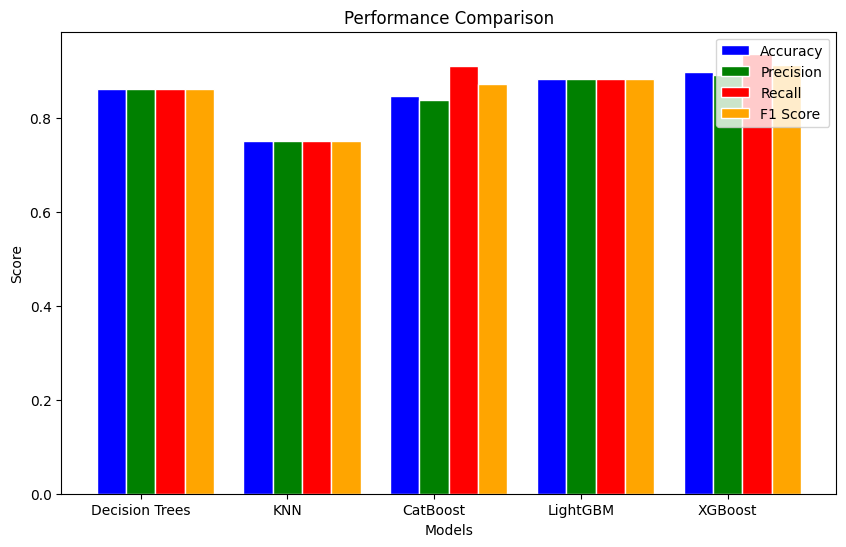

In [ ]:
# Create data
models = ['Decision Trees', 'KNN', 'CatBoost', 'LightGBM', 'XGBoost']
accuracy = [0.861314, 0.751825, 0.846715, 0.883212, 0.89781]
precision = [0.861709, 0.750898, 0.837209, 0.883485, 0.891566]
recall = [0.861314, 0.751825, 0.911392, 0.883212, 0.936709]
f1_score = [0.861465, 0.751199, 0.872727, 0.882568, 0.91358]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='white', label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Display the chart
plt.show()

# CROSS VALIDATION TESTING

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from xgboost import XGBClassifier

# Create the XGBoost classifier
xgb_classifier_1 = XGBClassifier()

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(xgb_classifier_1, X_train_pca, y_train, cv=5, scoring=scoring)

# Print the scores
print("Accuracy Scores:", cv_results['test_accuracy'])
print("Precision Scores:", cv_results['test_precision'])
print("Recall Scores:", cv_results['test_recall'])
print("F1 Scores:", cv_results['test_f1_score'])
print("Average Accuracy:", cv_results['test_accuracy'].mean())

Accuracy Scores: [0.83636364 0.86363636 0.88181818 0.88990826 0.91743119]
Precision Scores: [0.83545101 0.86305195 0.88248399 0.88947613 0.91721072]
Recall Scores: [0.83636364 0.86363636 0.88181818 0.88990826 0.91743119]
F1 Scores: [0.83561879 0.86266499 0.88207566 0.88937517 0.9172396 ]
Average Accuracy: 0.8778315262718932


## PAIR PLOT

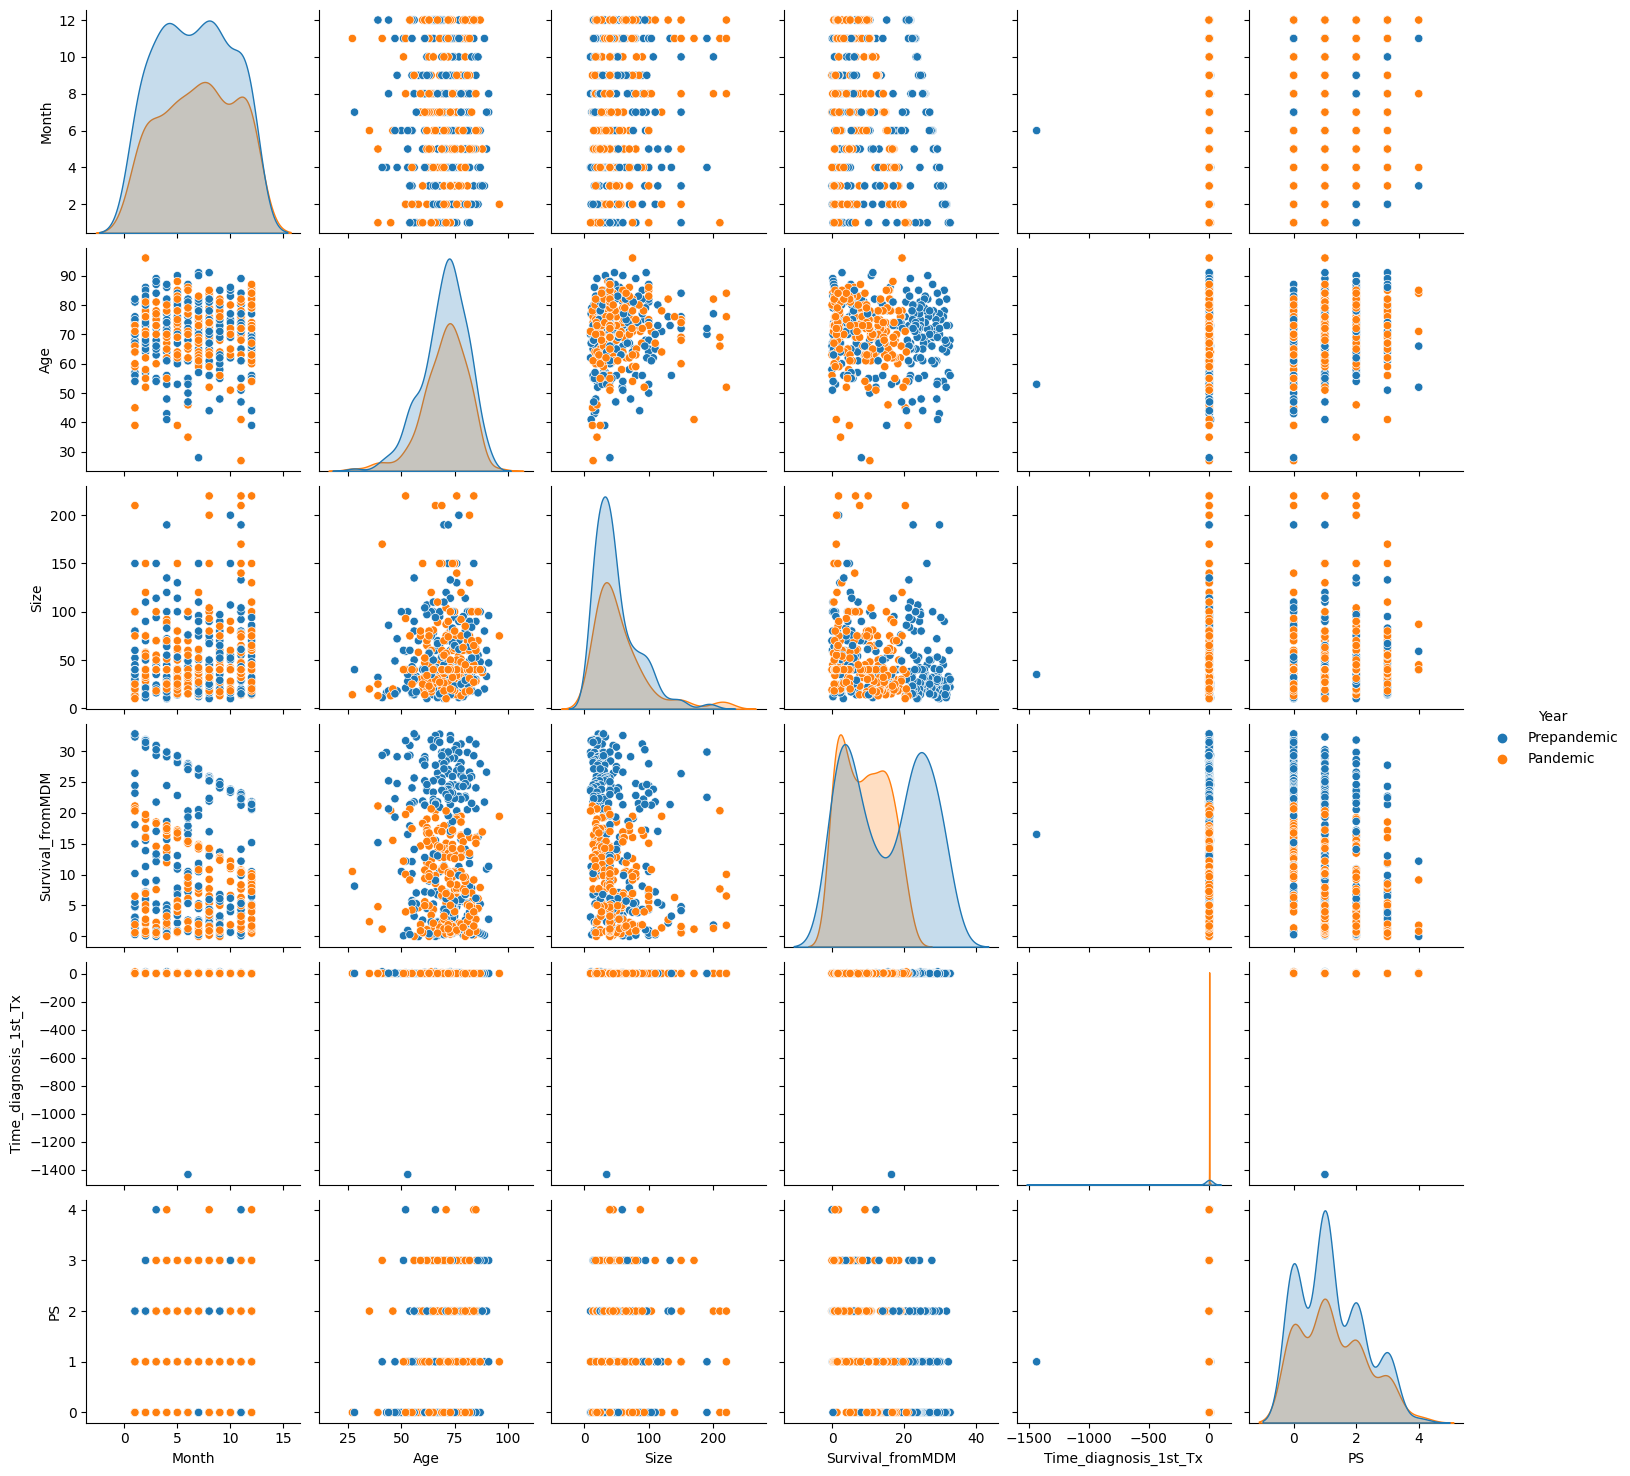

In [ ]:
# Select a subset of features for visualization
subset_features = ['Month', 'Age', 'Size', 'Survival_fromMDM','Time_diagnosis_1st_Tx', 'PS', 'Year']

# Create a pair plot with the selected features
sns.pairplot(data=df[subset_features], hue='Year')
plt.show()